initial peak intensity (a) = 3.345174692888647 +/- 0.026948718302806436
relaxation rate (b) = 0.001174393420961889 +/- 2.15302764986696e-05
baseline correction (c) = 0.009296336757729493 +/- 0.02881573112634138


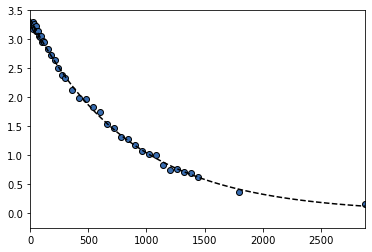

In [8]:
import numpy as np
import sys
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

##function for fitting
##b is the value i want. 
##c is an offset to deal with the fact that the 0 doesn't always arrive at 0 in nvj
def func(x,a,b,c):
    return a*np.exp(-b*x)+c


#data points collected. 
#Can be truncated to fit a subset of the full dataset (to avoid fitting noise)
numpoints = 47
#x axis in minutes
xvar = 2880 


#read in data from a text file.
#this expects a tab-separated document with 3 columns:
#time (in minutes), peak intensity (arbitrary units), and error in the intensity measurement

time_list = []
value_list = []
error_list = []
with open('../data/example_hx_decay.txt','r') as F:
    for line in F:
        time, value, error = line.strip('\n').split('\t')
        time_list.append(float(time))
        value_list.append(float(value))
        error_list.append(float(error))

#fit data to a model
popt,pcov = curve_fit(func,time_list[0:numpoints],value_list[0:numpoints],
                      sigma=error_list[0:numpoints],absolute_sigma=True,p0=(1,1e-2,1))

#calculate parameter error from covariance matrix
error = np.sqrt(np.diag(pcov))


plt.style.use('seaborn-deep')
plt.plot(time_list[0:numpoints],value_list[0:numpoints],'o',color="#386cb0",mec='k')

#generate x and y array for the fit
xx = np.linspace(0,xvar,100)
yy = func(xx,*popt)

#plot fit line
plt.plot(xx,yy,'k--')


#define x and y limits
plt.xlim(0,xvar)
plt.ylim(-0.25,3.5)


#optional: save figure
#plt.savefig('hydrogen_exchange_with_fit.txt')



print(f'initial peak intensity (a) = {popt[0]} +/- {error[0]}')
print(f'relaxation rate (b) = {popt[1]} +/- {error[1]}')
print(f'baseline correction (c) = {popt[2]} +/- {error[2]}')

